# Sarita - DSWDEOB 26082022

# Dimension Reduction

## Data Collection

Data: 
   The dataset contains details of heart patients.

Data Dictionary:
- Dataset contains 303 Heart Pateint details
- 14 features are recorded for Heart Patient

Description:
- age :      age of patient 
- sex :      sex of patient 
- cp  :      chest pain type (4 values)
- trestbps : resting blood pressure
- chol   :   serum cholestoral in mg/dl
- fbs    :   fasting blood sugar > 120 mg/dl
- restecg :  resting electrocardiographic results (values 0,1,2)
- thalach :  maximum heart rate achieved
- exang   :  exercise induced angina
- oldpeak :  ST depression induced by exercise relative to rest
- slope   :  the slope of the peak exercise ST segment
- ca     :   number of major vessels (0-3) colored by flourosopy
- thal:  :   0 = normal; 1 = fixed defect; 2 = reversable defect
- target :   The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

#### Install the required packages if not available

In [1]:
#!pip install feature_engine
# !pip install dtale

**Importing required packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA
from kneed import KneeLocator

### Suppress the Warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

**Import the data**

In [4]:
df = pd.read_csv(r"C:\Users\Ajay Nandal\Downloads\Datasets_PCA_Problem Statement\heart disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS

***Descriptive Statistics and Data Distribution Function***

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Preprocessing

In [7]:
# Drop the unwanted features
#df1 = df.drop(["UnivID"], axis = 1)

In [9]:
df1 = df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Checking Null Values

In [10]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### PCA can be implemented only on Numeric features

In [11]:
numeric_features = df1.select_dtypes(exclude = ['object']).columns

In [12]:
numeric_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Define the Pipeline steps

#### Define PCA model

In [13]:
pca = PCA(n_components = 6)

## Make Pipeline

**By using mean imputation, null values can be imputed**

**Data has to be standardized to address the scale difference**

In [14]:
num_pipeline = make_pipeline(SimpleImputer(strategy = 'mean'), StandardScaler(), pca)

In [15]:
# Pass the raw data through pipeline

processed = num_pipeline.fit(df1[numeric_features]) 

In [16]:
processed

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

In [18]:
# Apply the pipeline on the dataset
HD = pd.DataFrame(processed.transform(df1[numeric_features]))

HD

,0,1,2,3,4,5
0,-0.051739,2.624022,0.990054,3.479328,0.362773,1.695836
1,-0.817441,-0.730375,-0.235928,2.767545,2.258404,-0.808414
2,-2.057599,-0.039098,-0.519839,0.081198,0.860416,0.752783
3,-1.903043,-0.596701,0.076204,-0.082624,-0.235141,-0.500292
4,-0.768371,0.412545,-2.187455,-1.988510,0.017448,-0.074219
...,...,...,...,...,...,...
298,1.485287,-0.423483,-1.683247,-0.490555,-0.187162,-0.525461
299,-0.140325,-1.215922,0.138325,0.977923,0.884803,-1.240199
300,2.681772,0.593019,1.791015,1.300262,-1.331351,-1.201660
301,2.170858,-2.166992,-0.081516,0.890244,-1.177444,-0.346770


## Save the End to End PCA pipeline with Imputation and Standardization

In [19]:
import joblib

joblib.dump(processed, 'Data_prep_DimRed')

['Data_prep_DimRed']

In [20]:
import os 
os.getcwd()

'C:\\Users\\Ajay Nandal'

## Import the pipeline

In [21]:
model = joblib.load("Data_prep_DimRed")

In [22]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6))])

## Apply the saved model on to the Dataset to extract PCA values

In [23]:
pca_res = pd.DataFrame(model.transform(df1[numeric_features]))

pca_res

,0,1,2,3,4,5
0,-0.051739,2.624022,0.990054,3.479328,0.362773,1.695836
1,-0.817441,-0.730375,-0.235928,2.767545,2.258404,-0.808414
2,-2.057599,-0.039098,-0.519839,0.081198,0.860416,0.752783
3,-1.903043,-0.596701,0.076204,-0.082624,-0.235141,-0.500292
4,-0.768371,0.412545,-2.187455,-1.988510,0.017448,-0.074219
...,...,...,...,...,...,...
298,1.485287,-0.423483,-1.683247,-0.490555,-0.187162,-0.525461
299,-0.140325,-1.215922,0.138325,0.977923,0.884803,-1.240199
300,2.681772,0.593019,1.791015,1.300262,-1.331351,-1.201660
301,2.170858,-2.166992,-0.081516,0.890244,-1.177444,-0.346770


In [24]:
# PCA weights

model['pca'].components_

array([[ 0.25395987,  0.12203775, -0.27455103,  0.14736218,  0.09219679,
         0.05292799, -0.11192431, -0.36644297,  0.33567328,  0.36977228,
        -0.32546054,  0.26157569,  0.22260161, -0.43829464],
       [ 0.44468536, -0.39157094,  0.26756302,  0.44342889,  0.35896621,
         0.30597443, -0.21329742, -0.00222996, -0.20511511,  0.02602444,
        -0.03948423,  0.09316679, -0.19208883,  0.15114056],
       [-0.06690997,  0.55956069,  0.22733463,  0.19892862, -0.1807147 ,
         0.4680359 , -0.20297114,  0.267379  , -0.12227031, -0.08854878,
         0.19584514,  0.30462138,  0.24107941, -0.12123259],
       [-0.06635435,  0.0812111 ,  0.37876048,  0.08977285, -0.50929857,
         0.15827931,  0.19019467, -0.12648021, -0.10043565,  0.36991149,
        -0.49776365, -0.19246754, -0.23576839,  0.11641992],
       [-0.30674004,  0.05612852,  0.15936941,  0.18688032,  0.32139792,
        -0.23098765, -0.39705338,  0.32245069,  0.03909709,  0.24936586,
        -0.24444072, -0.43

In [25]:
# Take a closer look at the components
components = pd.DataFrame(model['pca'].components_, columns = numeric_features).T
components.columns = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5']

components

,pc0,pc1,pc2,pc3,pc4,pc5
age,0.253960,0.444685,-0.066910,-0.066354,-0.306740,-0.126418
sex,0.122038,-0.391571,0.559561,0.081211,0.056129,0.062044
cp,-0.274551,0.267563,0.227335,0.378760,0.159369,-0.198399
trestbps,0.147362,0.443429,0.198929,0.089773,0.186880,-0.181346
chol,0.092197,0.358966,-0.180715,-0.509299,0.321398,-0.103434
fbs,0.052928,0.305974,0.468036,0.158279,-0.230988,0.253369
restecg,-0.111924,-0.213297,-0.202971,0.190195,-0.397053,-0.668392
thalach,-0.366443,-0.002230,0.267379,-0.126480,0.322451,-0.123426
exang,0.335673,-0.205115,-0.122270,-0.100436,0.039097,0.237410
oldpeak,0.369772,0.026024,-0.088549,0.369911,0.249366,-0.171231


In [26]:
print(model['pca'].explained_variance_ratio_)

[0.23581966 0.11229748 0.08800207 0.08618849 0.07300207 0.06929774]


In [27]:
var1 = np.cumsum(model['pca'].explained_variance_ratio_)

print(var1)

[0.23581966 0.34811715 0.43611922 0.52230771 0.59530979 0.66460753]


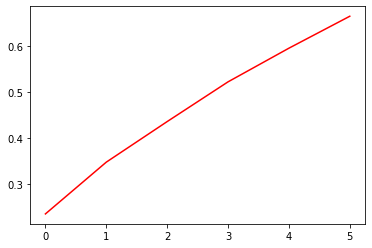

In [28]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

## KneeLocator
Refer the link to understand the parameters used: https://kneed.readthedocs.io/en/stable/parameters.html    


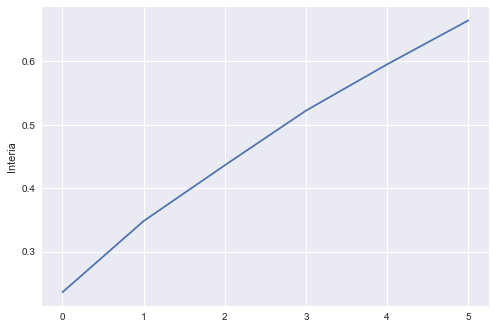

In [30]:
# from kneed import KneeLocator
kl = KneeLocator(range(len(var1)), var1, curve = 'concave', direction = "increasing") 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(len(var1)), var1)
plt.xticks(range(len(var1)))
plt.ylabel("Interia")
#plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

Kneelocator recommends 3 PCs as the ideal number of features to be considered

# PCA for Feature Extraction

In [32]:
# Final dataset with manageable number of columns (Feature Extraction)

final = pd.concat([df.age, pca_res.iloc[:, 0:3]], axis = 1)
final.columns = ['age', 'pc0', 'pc1', 'pc2']
final

,age,pc0,pc1,pc2
0,63,-0.051739,2.624022,0.990054
1,37,-0.817441,-0.730375,-0.235928
2,41,-2.057599,-0.039098,-0.519839
3,56,-1.903043,-0.596701,0.076204
4,57,-0.768371,0.412545,-2.187455
...,...,...,...,...
298,57,1.485287,-0.423483,-1.683247
299,45,-0.140325,-1.215922,0.138325
300,68,2.681772,0.593019,1.791015
301,57,2.170858,-2.166992,-0.081516


0      Text(-0.05173910760826489, 2.624022040350807, ...
1      Text(-0.8174405938124412, -0.7303745764645023,...
2      Text(-2.057599322554912, -0.039098446311255426...
3      Text(-1.9030431846461966, -0.596700877245276, ...
4      Text(-0.7683706199246914, 0.4125454959715794, ...
                             ...                        
298    Text(1.4852871587607464, -0.4234831744936257, ...
299    Text(-0.1403253790530735, -1.2159220521656138,...
300    Text(2.6817720617178624, 0.5930189445601489, '...
301    Text(2.1708579312401275, -2.1669920450598132, ...
302    Text(-0.3657596568455729, 0.7879160765700162, ...
Length: 303, dtype: object

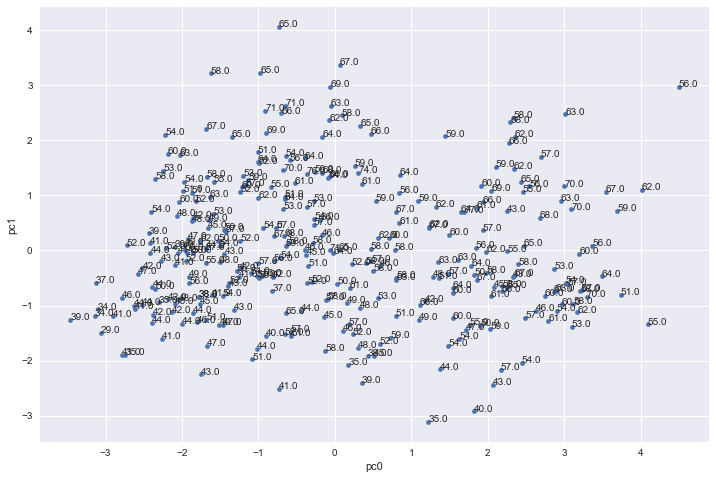

In [33]:
# Scatter diagram
ax = final.plot(x = 'pc0', y = 'pc1', kind = 'scatter', figsize = (12, 8))
final[['pc0', 'pc1', 'age']].apply(lambda x: ax.text(*x), axis = 1)

# Prediction on new data

In [114]:
newdf = pd.read_excel(r"C:\Users\asus\DataScience\codes_DS_sample\clustering_University_csv\new_Univ_4_pred.xlsx")

newdf

,UnivID,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,5,Cornell,NY,1280.0,83.0,33.0,13.0,21864.0,90.0
1,6,Dartmouth,NH,1340.0,89.0,23.0,10.0,32162.0,95.0
2,7,Duke,NC,1315.0,90.0,30.0,NaN,31585.0,95.0
3,8,Georgetown,DC,NaN,74.0,24.0,12.0,20126.0,92.0
4,9,Harvard,MA,1400.0,91.0,NaN,11.0,39525.0,NaN
5,10,JohnsHopkins,MD,1305.0,75.0,44.0,7.0,58691.0,87.0
6,11,MIT,MA,1380.0,NaN,30.0,10.0,34870.0,91.0
7,12,Northwestern,IL,1260.0,85.0,39.0,11.0,NaN,89.0
8,13,NotreDame,IN,1255.0,81.0,42.0,13.0,15122.0,94.0


In [115]:
# Drop the unwanted features
newdf1 = newdf.drop(["UnivID"], axis = 1)

In [116]:
num_feat = newdf1.select_dtypes(exclude = ['object']).columns

In [117]:
new_res = pd.DataFrame(model.transform(newdf1[numeric_features]))

new_res

,0,1,2,3,4,5
0,-0.310925,-0.640049,0.006737,0.165489,0.018108,-0.023414
1,-1.695867,-0.348666,-0.255731,0.009171,-0.055605,-0.035697
2,-1.176329,-0.573581,0.063394,-0.309534,0.303622,-0.042442
3,-0.389018,-0.782644,-0.464465,0.064073,-0.549292,-0.083806
4,-1.378941,0.622546,0.518625,0.123536,0.424306,0.566928
5,-1.402687,2.116496,-0.446030,-0.641238,0.218553,-0.224627
6,-1.332604,0.266357,-0.289792,-0.078167,-0.231197,0.593349
7,-0.432897,-0.044802,-0.190022,0.252927,0.272037,-0.306686
8,0.041397,-1.013733,-0.510428,0.215909,0.441974,0.004041
